# Wind Turbine Suitability Prediction Model

### Exploratory Data Analysis and Pre-processing
- Load dataset
- Look for null values and perform data imputation
- Visualize relationships between pairs of features
- Visualize correlation heatmap
- Select features for modelling

In [1]:
# Load labelled_mesonet_data CSVs from batch folders into single dataframe

import pandas as pd
from pathlib import Path

labeled_data_dir = Path('data/labeled_mesonet_data')
batch_folders = sorted(labeled_data_dir.glob('batch_*'))

all_dfs = []
for batch_folder in batch_folders:
    for csv_file in batch_folder.glob('*_measurements.csv'):
        df = pd.read_csv(csv_file)
        all_dfs.append(df)

df_combined = pd.concat(all_dfs, ignore_index=True)

print(f"Loaded {len(all_dfs)} CSV files from {len(batch_folders)} batches")
print(f"\nDataframe shape (rows, columns): {df_combined.shape}")
print(f"\nAll columns: {df_combined.columns.tolist()}")

Loaded 2741 CSV files from 28 batches

Dataframe shape (rows, columns): (1025763, 30)

All columns: ['time', 'airTemperature', 'avgGlobalSolarRadiation', 'barometricPressure', 'cumulativeGlobalSolarRadiation', 'dewPointTemperature', 'fireWeatherIndex', 'heatIndex', 'mslp', 'precipitation', 'precipitationRate', 'rainfall', 'reflectedShortwaveRadiation', 'relativeHumidity', 'seaSurfaceTemperature', 'seaSurfaceTemperature1m', 'snowDepth', 'snowfall', 'visibility', 'waveDirection', 'waveHeight', 'waveHeightMax', 'wetBulbTemperature', 'windChill', 'windDirection', 'windGust', 'windGust10m', 'windSpeed', 'windSpeed10m', 'TurbineScore']


In [2]:
# Remove rows that are largely null (except for 'time' and 'TurbineScore' columns)

df_combined.dropna(how='all', subset=df_combined.columns.difference(['time', 'TurbineScore']), inplace=True)
print(f"\nDataframe shape after dropping largely null rows: {df_combined.shape}")


Dataframe shape after dropping largely null rows: (858618, 30)


In [3]:
# Get statistics and null value counts

display(df_combined.describe()) # Display basic statistics

# Column null counts
null_counts = df_combined.isnull().sum().sort_values(ascending=False)
print(f'\nNull value counts per column: \n{null_counts}')

# Number of rows with no null columns
num_complete_rows = df_combined.dropna().shape[0]
print(f'\nNumber of complete rows (no nulls): {num_complete_rows}')

,airTemperature,avgGlobalSolarRadiation,barometricPressure,cumulativeGlobalSolarRadiation,dewPointTemperature,fireWeatherIndex,heatIndex,mslp,precipitation,precipitationRate,...,waveHeight,waveHeightMax,wetBulbTemperature,windChill,windDirection,windGust,windGust10m,windSpeed,windSpeed10m,TurbineScore
count,811000.000000,6.303300e+04,4.026130e+05,16322.000000,729534.000000,54743.000000,223.000000,398271.000000,4.223820e+05,26231.000000,...,12862.000000,8558.000000,182242.000000,225.000000,674327.000000,9.986500e+04,5.323690e+05,1.448070e+05,7.005970e+05,858618.000000
mean,4.749284,-1.915557e+27,-7.737897e+25,741.479261,-0.466643,8.496059,9.080835,1015.388914,-3.961043e+25,0.101072,...,0.666042,1.786956,5.602005,5.247004,193.907188,-6.114396e+26,-1.362232e+26,-1.262156e+26,-3.098355e+25,0.357223
std,12.254847,1.736563e+29,4.909835e+28,457.151084,11.665375,8.856817,9.856910,11.619719,2.190073e+28,0.362739,...,0.594322,1.719636,10.238480,11.863144,66.270606,1.805581e+29,9.287835e+28,4.802943e+28,2.593373e+28,0.479182
min,-55.283130,-1.678201e+31,-3.115378e+31,0.000000,-97.741667,0.000000,-18.925000,778.837500,-1.396151e+31,0.000000,...,0.000000,0.000000,-55.349179,-30.383333,-67.333333,-5.690757e+31,-6.758760e+31,-1.827688e+31,-2.170697e+31,0.000000
25%,-2.472728,1.088542e+02,9.560958e+02,379.156598,-6.703044,0.807458,4.991667,1009.797222,0.000000e+00,0.000000,...,0.200000,0.500000,0.545087,1.527273,148.291667,8.941500e+00,1.197119e+01,3.717391e+00,4.769444e+00,0.000000
50%,6.675000,1.821071e+02,9.865375e+02,704.586373,1.373556,5.925696,11.550000,1015.587500,1.842105e-02,0.000000,...,0.541667,1.237500,7.762149,8.057895,195.333333,1.363636e+01,1.797083e+01,6.616667e+00,8.206122e+00,0.000000
75%,14.475060,2.603208e+02,1.005250e+03,1053.185032,8.218109,13.500000,15.597143,1021.241667,2.883651e-01,0.027917,...,1.000000,2.516667,12.996013,12.540000,242.791667,2.056667e+01,2.770000e+01,1.171250e+01,1.338333e+01,1.000000
max,391.183333,8.287321e+23,7.145204e+03,3151.720000,45.444737,86.500000,26.233333,1130.350000,8.287321e+23,15.988889,...,6.833333,16.966667,31.725000,24.166667,423.384615,1.317000e+02,9.882125e+02,5.764608e+12,6.846470e+12,1.000000



Null value counts per column: 
heatIndex                         858395
windChill                         858393
reflectedShortwaveRadiation       858354
seaSurfaceTemperature1m           857986
waveDirection                     851959
seaSurfaceTemperature             850836
waveHeightMax                     850060
waveHeight                        845756
snowfall                          842990
cumulativeGlobalSolarRadiation    842296
precipitationRate                 832387
fireWeatherIndex                  803875
avgGlobalSolarRadiation           795585
windGust                          758753
snowDepth                         755144
visibility                        755045
windSpeed                         713811
wetBulbTemperature                676376
rainfall                          575027
mslp                              460347
barometricPressure                456005
precipitation                     436236
windGust10m                       326249
windDirection            

In [4]:
# Take columns with the least null value counts for further analysis and compare dataset size for different null count thresholds

selected_columns = [
    'mslp',
    'barometricPressure',
    'windDirection',
    'windSpeed10m',
    'relativeHumidity',
    'dewPointTemperature',
    'airTemperature',
    'TurbineScore'
]
df_selected = df_combined[selected_columns].copy()

# Number of rows with no/<2/<3 null values in selected columns
num_complete_selected_rows = df_selected.dropna().shape[0]
print(f'\nNumber of complete rows in selected columns: {num_complete_selected_rows}')

num_rows_at_most_1_null = df_selected[df_selected.isnull().sum(axis=1) <= 1].shape[0]
print(f'Number of rows with at most 1 null value in selected columns: {num_rows_at_most_1_null}')


Number of complete rows in selected columns: 368320
Number of rows with at most 1 null value in selected columns: 379036


In [5]:
# Perform data imputation on null values (median)

for column in selected_columns:
    if column != 'TurbineScore':
        median_value = df_selected[column].median()
        df_selected[column] = df_selected[column].fillna(median_value)

df_selected.head()

,mslp,barometricPressure,windDirection,windSpeed10m,relativeHumidity,dewPointTemperature,airTemperature,TurbineScore
13,1014.000000,980.531429,186.171429,6.971429,67.571429,1.462857,7.217143,1
14,1008.726316,974.055882,268.352941,7.568627,90.044118,3.001471,4.545588,1
15,1003.692857,970.162162,224.121622,3.979730,96.838235,5.119118,5.504054,1
16,1009.777778,975.898810,176.952381,11.085979,99.869048,3.626190,3.644048,1
17,1018.037500,984.005000,186.533333,6.037963,99.833333,2.620000,2.645000,1


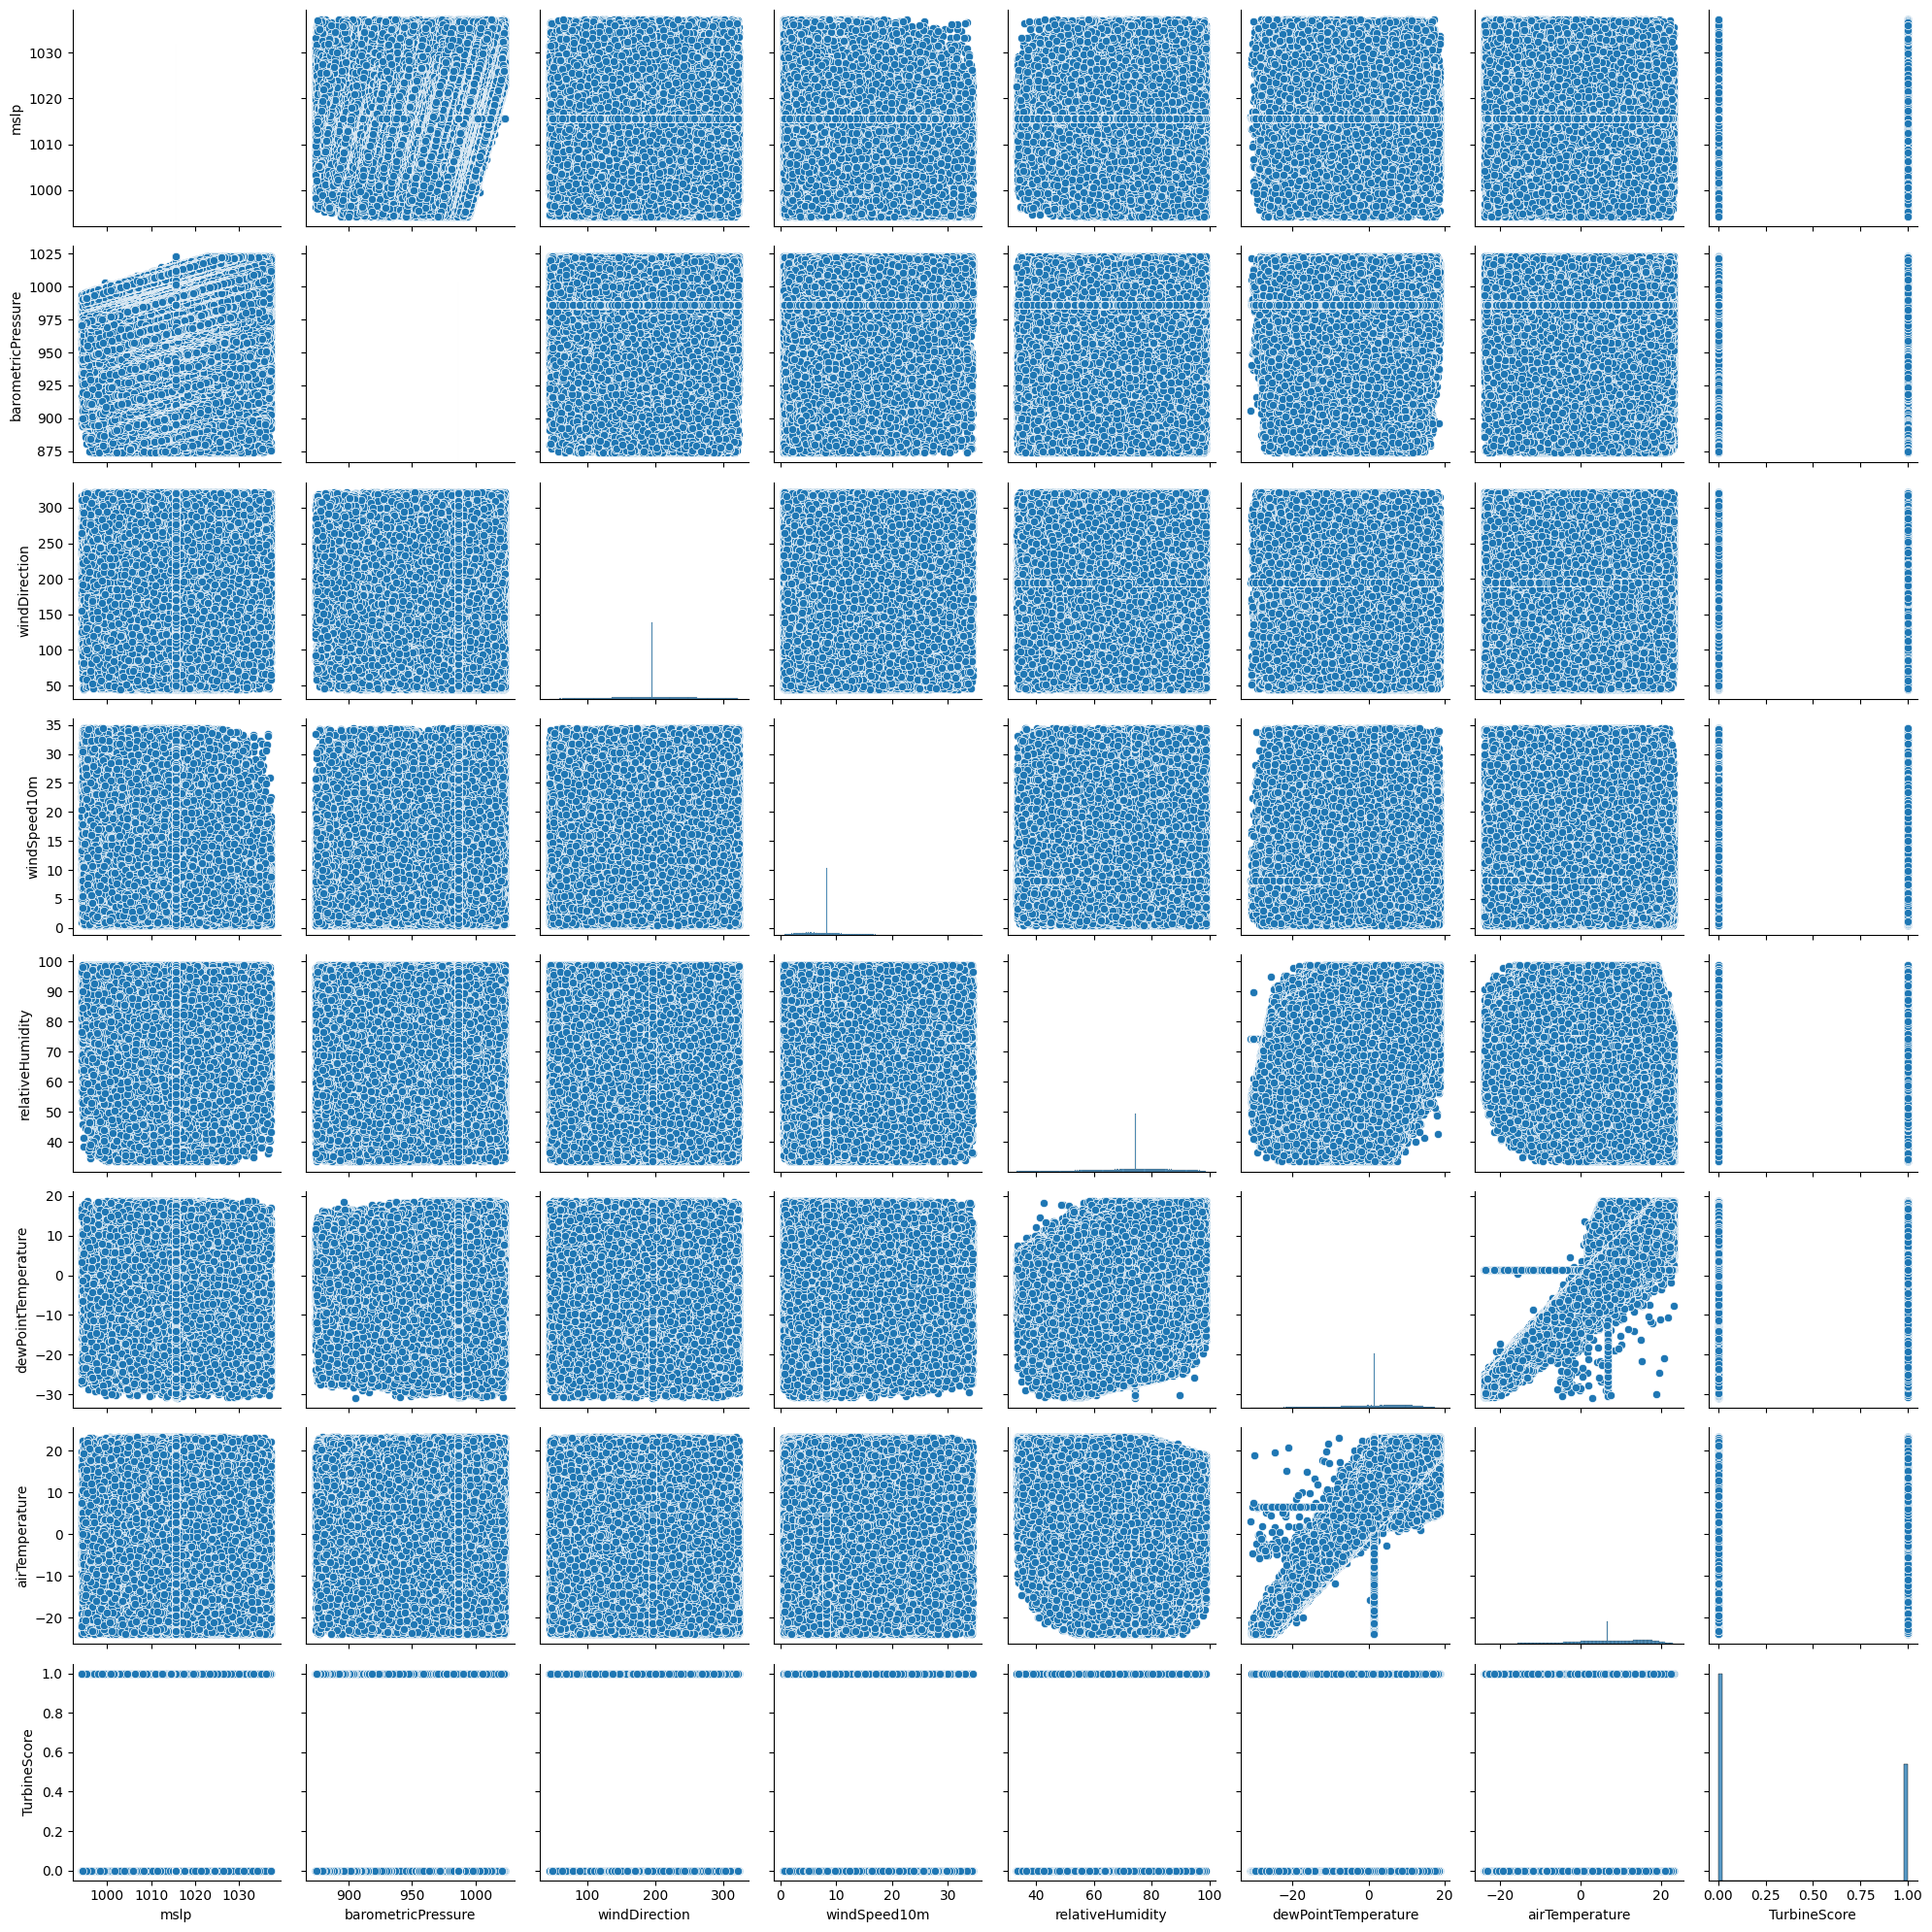

In [6]:
# Remove outliers (using percentile-based filtering) and visualize relationships between features

import matplotlib.pyplot as plt
import seaborn as sns

for column in selected_columns:
    if column != 'TurbineScore':
        lower_bound = df_selected[column].quantile(0.01)
        upper_bound = df_selected[column].quantile(0.99)
        df_selected = df_selected[(df_selected[column] >= lower_bound) & (df_selected[column] <= upper_bound)]

sns.pairplot(df_selected, height=2.5)
plt.tight_layout()
plt.show()

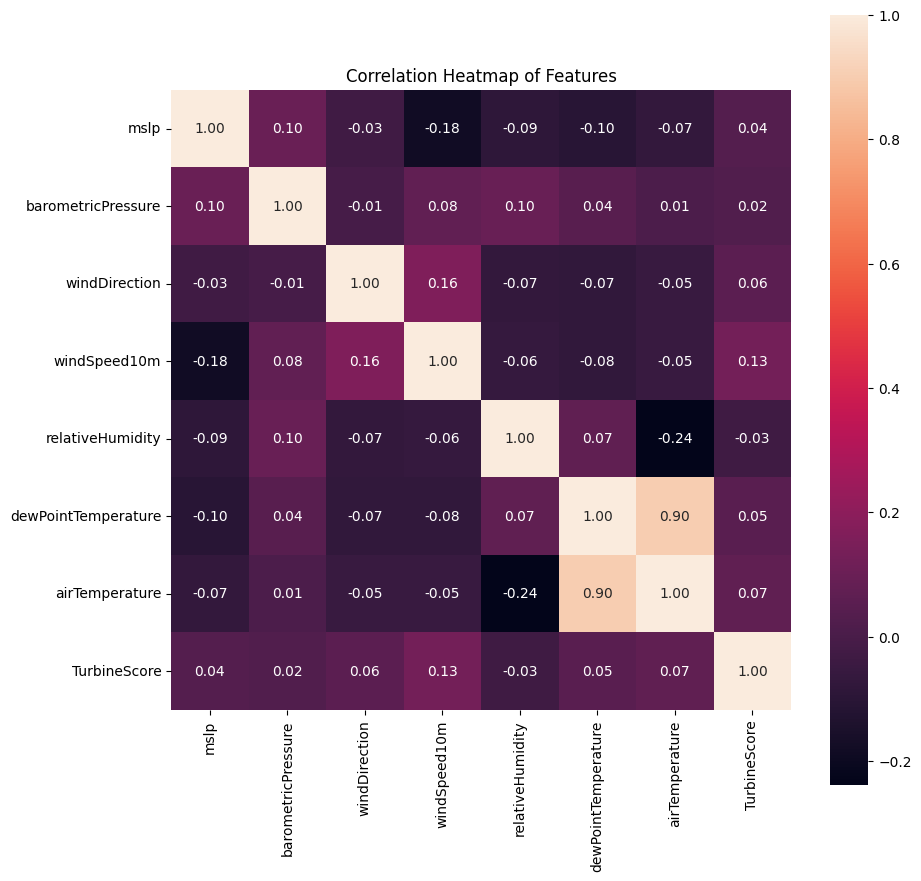

In [7]:
# Visualize correlation heatmap

correlation_matrix = df_selected.corr()
plt.figure(figsize=(10, 10))
hm = sns.heatmap(correlation_matrix, cbar=True,annot=True,
                 square=True, fmt='.2f',
                 yticklabels=correlation_matrix.columns,
                 xticklabels=correlation_matrix.columns)

plt.title("Correlation Heatmap of Features")
plt.show()

## Model Exploration

In [8]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import time

X = df_selected[selected_columns[:-1]]
y = df_selected['TurbineScore']

# (For neural network, X_train and y_train will be split into training and validation sets)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

def train_model(model, X_train, y_train, X_val=None, y_val=None):
    ''' Helper function to train the model and return the time taken '''

    start_time = time.time()
    
    train_losses = []
    val_losses = []
    
    # Get the classifier from the pipeline (last step)
    if hasattr(model, 'named_steps'):
        classifier = list(model.named_steps.values())[-1]
    else:
        classifier = model
    
    # Checking if the classifier supports iterative training (warm_start=True)
    if hasattr(classifier, 'warm_start') and classifier.warm_start:
        for i in range(10):
            model.fit(X_train, y_train)
            
            # Training loss
            if hasattr(classifier, 'loss_'):
                train_losses.append(classifier.loss_)
            
            # Validation loss
            if X_val is not None and y_val is not None and hasattr(model, 'predict_proba'):
                y_val_pred_proba = model.predict_proba(X_val)
                val_loss = log_loss(y_val, y_val_pred_proba)
                val_losses.append(val_loss)

    else:
        model.fit(X_train, y_train)
        
    train_time = (time.time() - start_time) * 1000 # (Converting to ms)
    return train_time, train_losses, val_losses


def test_model(model, model_name):
    ''' Helper function to test the model and return time taken '''

    start_time = time.time()
    y_test_pred = model.predict(X_test)
    test_time = (time.time() - start_time) * 1000
    
    # Reporting metrics of predictions (for Q2.1)
    print(f"\n--- {model_name} PREDICTION RESULTS ---")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("F1 Score: ", f1_score(y_test, y_test_pred))
    print("Recall: ", recall_score(y_test, y_test_pred))
    print("Precision: ", precision_score(y_test, y_test_pred))
    print("Accuracy: ", accuracy_score(y_test, y_test_pred))

    # Plotting ROC curve and reporting AUC of predictions (for Q2.2)
    y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    roc_auc = roc_auc_score(y_test, y_test_prob)
    
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()
        
    return test_time


### SVM

[LibSVM].......................................................................................................................................................................................................................................................................................................................................................................................................................................
*........................................................................................................................................*.........................................................................................................................................*..................*......
*.
*
optimization finished, #iter = 719653
obj = -438725.961694, rho = -1.301873
nSV = 444292, nBSV = 441878
Total nSV = 444292
SVM TRAINING TIME: 5554746.20 ms

--- SVM PREDICTION RESULTS ---
Confusion Matrix:
 [[44794  2819]
 [20492  6442]]
F1 Score:  0.3559607680

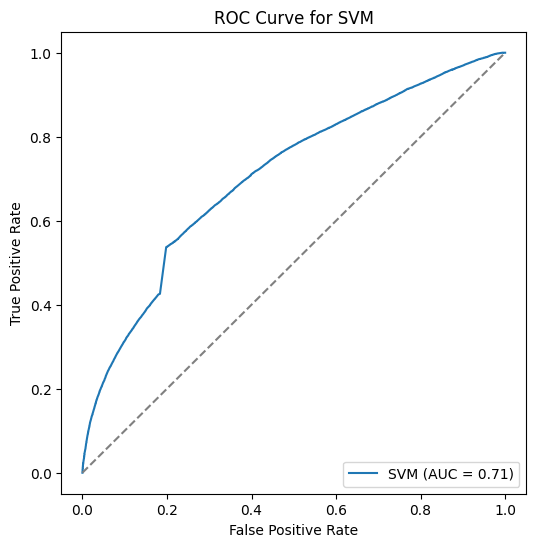

SVM TESTING TIME: 434157.22 ms


In [9]:
svm_model = Pipeline([
    ('scale', StandardScaler()),
    ('svm', SVC(kernel='rbf', gamma='scale', verbose=True)) 
    ])

svm_train_time, _, _ = train_model(svm_model, X_train, y_train)
print(f"SVM TRAINING TIME: {svm_train_time:.2f} ms")

svm_test_time = test_model(svm_model, "SVM")
print(f"SVM TESTING TIME: {svm_test_time:.2f} ms")

### KNN

KNN TRAINING TIME: 446.02 ms

--- KNN PREDICTION RESULTS ---
Confusion Matrix:
 [[37590 10023]
 [12478 14456]]
F1 Score:  0.5623480442689592
Recall:  0.536719388133957
Precision:  0.5905469994689325
Accuracy:  0.6981635746575986


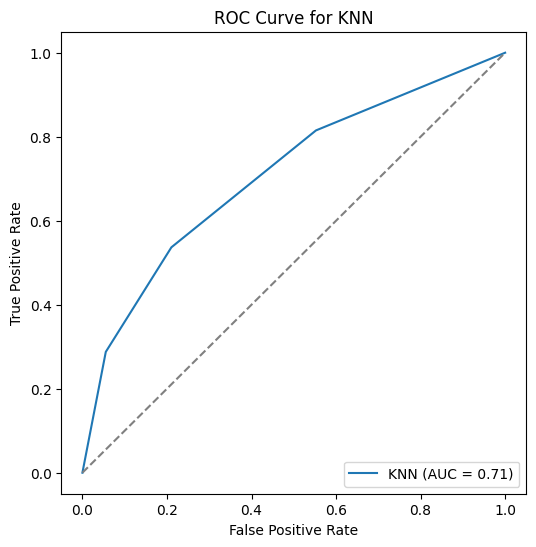

KNN TESTING TIME: 3974.52 ms


In [10]:
knn_model = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
    ])

knn_train_time, _, _ = train_model(knn_model, X_train, y_train)
print(f"KNN TRAINING TIME: {knn_train_time:.2f} ms")

knn_test_time = test_model(knn_model, "KNN")
print(f"KNN TESTING TIME: {knn_test_time:.2f} ms")

### Logistic Regression

LOGISTIC REGRESSION TRAINING TIME: 344.19 ms

--- Logistic Regression PREDICTION RESULTS ---
Confusion Matrix:
 [[45381  2232]
 [24612  2322]]
F1 Score:  0.14748475609756098
Recall:  0.08621073735798619
Precision:  0.5098814229249012
Accuracy:  0.6399050263592096


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


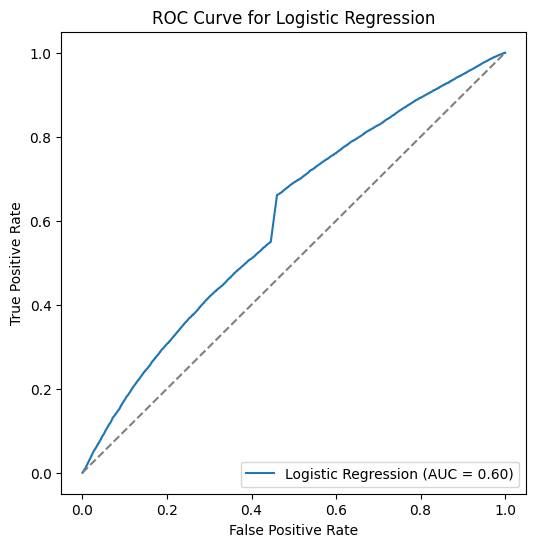

LOGISTIC REGRESSION TESTING TIME: 2.48 ms


In [11]:
log_reg_model = Pipeline([
    ('scale', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=10000, random_state=42, verbose=True))
    ])

log_reg_train_time, _, _ = train_model(log_reg_model, X_train, y_train)
print(f"LOGISTIC REGRESSION TRAINING TIME: {log_reg_train_time:.2f} ms")

log_reg_test_time = test_model(log_reg_model, "Logistic Regression")
print(f"LOGISTIC REGRESSION TESTING TIME: {log_reg_test_time:.2f} ms")

### Random Forest

RANDOM FOREST TRAINING TIME: 1508.22 ms

--- Random Forest PREDICTION RESULTS ---
Confusion Matrix:
 [[45379  2234]
 [22672  4262]]
F1 Score:  0.2549805563864792
Recall:  0.15823865745897378
Precision:  0.6560960591133005
Accuracy:  0.6659020483721679


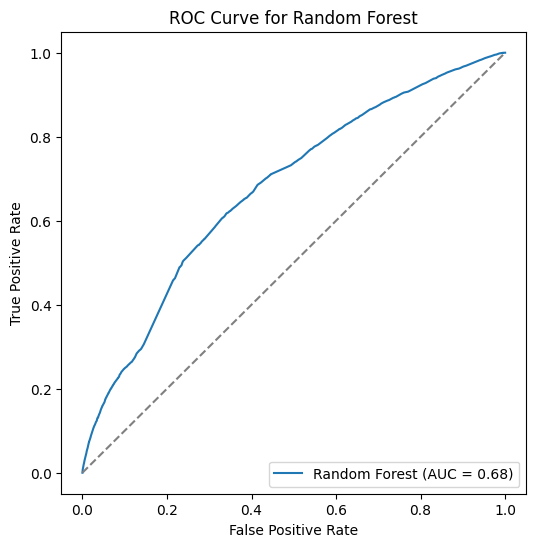

RANDOM FOREST TESTING TIME: 7.02 ms


In [12]:
# Grid search
param_grid = {  
    'n_estimators': [5, 10, 20],
    'max_depth': [5, 10, 20]
}

random_forest = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(random_forest, param_grid, cv=5)
grid_search.fit(X_train, y_train)

random_forest_model = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=42,)

random_forest_model_train_time, _, _ = train_model(random_forest_model, X_train, y_train)
print(f"RANDOM FOREST TRAINING TIME: {random_forest_model_train_time:.2f} ms")

random_forest_test_time = test_model(random_forest_model, "Random Forest")
print(f"RANDOM FOREST TESTING TIME: {random_forest_test_time:.2f} ms")

### XGBoost

[14:12:04] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536737, 7, 3757159).
[14:12:04] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536737, 7, 3757159).
[14:12:04] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:04] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).
[14:12:04] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).
[14:12:04] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536737, 7, 3757159).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:05] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536737, 7, 3757159).
[14:12:05] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).
[14:12:05] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:05] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).
[14:12:05] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536737, 7, 3757159).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:05] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536737, 7, 3757159).
[14:12:05] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:05] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).
[14:12:05] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:05] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536737, 7, 3757159).
[14:12:06] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536737, 7, 3757159).
[14:12:06] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:06] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).
[14:12:06] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).
[14:12:06] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536737, 7, 3757159).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:06] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536737, 7, 3757159).
[14:12:06] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:06] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).
[14:12:06] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:07] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536737, 7, 3757159).
[14:12:07] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536737, 7, 3757159).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:07] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).
[14:12:07] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:07] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).
[14:12:07] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536737, 7, 3757159).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:08] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536737, 7, 3757159).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:09] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:09] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:10] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:10] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536737, 7, 3757159).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:11] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536737, 7, 3757159).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:12] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:13] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:14] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:15] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536737, 7, 3757159).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:16] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536737, 7, 3757159).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:17] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:18] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:20] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (536738, 7, 3757166).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:21] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (670922, 7, 4696454).


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[14:12:22] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (670922, 7, 4696454).
XGBOOST TRAINING TIME: 81.87 ms

--- XGBoost PREDICTION RESULTS ---
Confusion Matrix:
 [[45025  2588]
 [19877  7057]]
F1 Score:  0.3858498045326553
Recall:  0.26201084131580904
Precision:  0.7316744427164333
Accuracy:  0.6986464914751768


/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:12:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


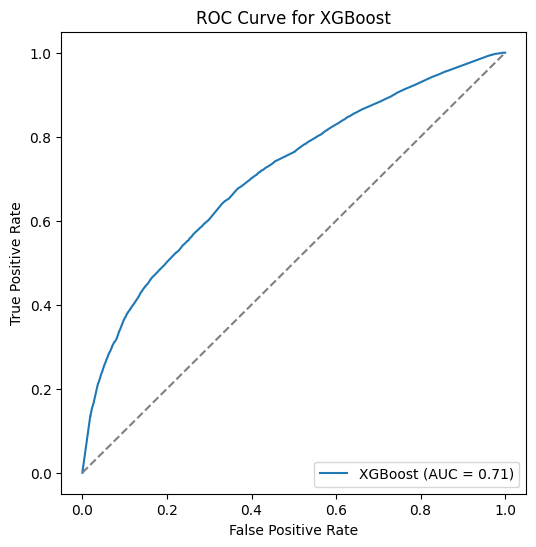

XGBOOST TESTING TIME: 1.26 ms


In [13]:
from xgboost import XGBClassifier

# Grid search
param_grid = {
    'n_estimators': [5, 10, 20],
    'max_depth': [5, 10, 20]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, verbosity=2)
grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

xgb_model = XGBClassifier(n_estimators=5, max_depth=5, use_label_encoder=False, eval_metric='logloss', random_state=42,verbosity=2)
xgb_model_train_time, _, _ = train_model(xgb_model, X_train, y_train)
print(f"XGBOOST TRAINING TIME: {xgb_model_train_time:.2f} ms") 

xgb_test_time = test_model(xgb_model, "XGBoost")
print(f"XGBOOST TESTING TIME: {xgb_test_time:.2f} ms")

### MLP

Iteration 1, loss = 0.60243695
Iteration 2, loss = 0.58403466
Iteration 3, loss = 0.57805180
Iteration 4, loss = 0.57472550
Iteration 5, loss = 0.57172379
Iteration 6, loss = 0.56920650
Iteration 7, loss = 0.56738407
Iteration 8, loss = 0.56586062
Iteration 9, loss = 0.56483877
Iteration 10, loss = 0.56393745
Iteration 11, loss = 0.56327575
Iteration 12, loss = 0.56272393
Iteration 13, loss = 0.56215729
Iteration 14, loss = 0.56155293
Iteration 15, loss = 0.56117389
Iteration 16, loss = 0.56071242
Iteration 17, loss = 0.56009159
Iteration 18, loss = 0.55986719
Iteration 19, loss = 0.55937372
Iteration 20, loss = 0.55906211
Iteration 21, loss = 0.55864333
Iteration 22, loss = 0.55834461
Iteration 23, loss = 0.55807530
Iteration 24, loss = 0.55785269
Iteration 25, loss = 0.55778643
Iteration 26, loss = 0.55746081
Iteration 27, loss = 0.55701441
Iteration 28, loss = 0.55704099
Iteration 29, loss = 0.55675270
Iteration 30, loss = 0.55648803
Iteration 31, loss = 0.55652781
Iteration 32, los

/home/collin/school/ds3000a-project-group10/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.55025726
Iteration 2, loss = 0.55041001
Iteration 3, loss = 0.55040722
Iteration 4, loss = 0.55006695
Iteration 5, loss = 0.55017776
Iteration 6, loss = 0.55008300
Iteration 7, loss = 0.54992921
Iteration 8, loss = 0.55005189
Iteration 9, loss = 0.55025342
Iteration 10, loss = 0.55019419
Iteration 11, loss = 0.54986444
Iteration 12, loss = 0.55011467
Iteration 13, loss = 0.55000828
Iteration 14, loss = 0.54995927
Iteration 15, loss = 0.54990923
Iteration 16, loss = 0.54965467
Iteration 17, loss = 0.54992943
Iteration 18, loss = 0.54963601
Iteration 19, loss = 0.54956825
Iteration 20, loss = 0.54966956
Iteration 21, loss = 0.54926019
Iteration 22, loss = 0.54950467
Iteration 23, loss = 0.54946246
Iteration 24, loss = 0.54924918
Iteration 25, loss = 0.54936349
Iteration 26, loss = 0.54933758
Iteration 27, loss = 0.54930297
Iteration 28, loss = 0.54944019
Iteration 29, loss = 0.54945397
Iteration 30, loss = 0.54924757
Iteration 31, loss = 0.54943700
Iteration 32, los

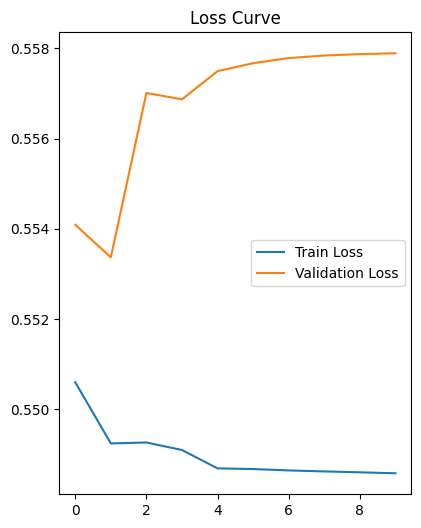


--- MLP PREDICTION RESULTS ---
Confusion Matrix:
 [[39988  7625]
 [13034 13900]]
F1 Score:  0.5736808435997441
Recall:  0.5160763347441895
Precision:  0.645760743321719
Accuracy:  0.7228728184903483


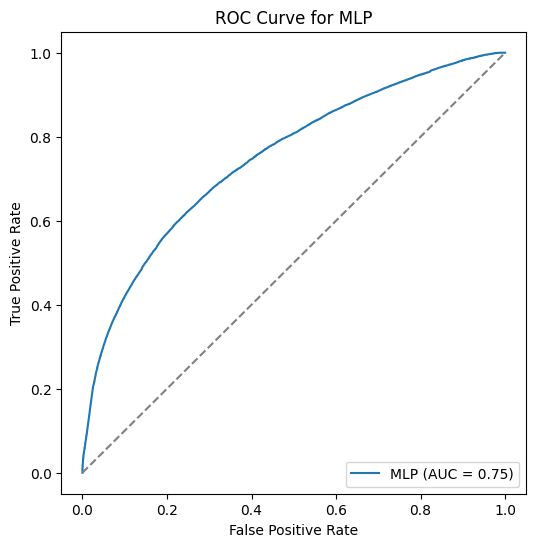

MLP TESTING TIME: 23.07 ms


In [14]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

X_train_nn, X_val, y_train_nn, y_val = train_test_split(
    X_train, y_train, test_size=0.222, random_state=42 # 0.222 * 0.9 = 0.2
)

mlp_model = Pipeline([
    ('scale', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(50, 100),
                                 activation='tanh',
                                 solver='sgd',
                                 learning_rate_init=0.1,
                                 max_iter=100,
                                 warm_start=True,
                                 verbose=True,
                                 random_state=42)
    )
])

mlp_train_time, mlp_train_losses, mlp_validation_losses = train_model(mlp_model, X_train_nn, y_train_nn, X_val, y_val)
print(f"MLP TRAINING TIME: {mlp_train_time:.2f} ms")

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(mlp_train_losses, label='Train Loss')
plt.plot(mlp_validation_losses, label='Validation Loss')
plt.legend()
plt.title("Loss Curve")

plt.show()

mlp_test_time = test_model(mlp_model, "MLP")
print(f"MLP TESTING TIME: {mlp_test_time:.2f} ms")